## imports

In [14]:
# i will try here... donno ... start with vgg or something
#jeremy batcher can be used
from cervical_utils import *
%matplotlib inline

In [10]:
#skip
import glob
import numpy as np
#read imagesis with: PIL, cv2, keras
from PIL import Image
from keras.preprocessing import image
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
from keras.applications.imagenet_utils import preprocess_input

from keras.applications import VGG16,ResNet50
from collections import Counter
import xgboost as xgb

from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

def do_clip(arr, mx):
    clipped = np.clip(arr, (1-mx)/1, mx)
    return clipped/clipped.sum(axis=1)[:, np.newaxis]

import bcolz
import pickle

def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()


def load_array(fname):
    return bcolz.open(fname)[:]


def save_pickle(fname, obj):
    with open(fname, "wb") as output_file:
        pickle.dump(obj, output_file)

def load_pickle(fname):
    with open(fname, "rb") as input_file:
        return pickle.load(input_file)

## preprocess

In [2]:
cd /mnt/kaggle_crevical

/mnt/kaggle_crevical


In [3]:
g=glob.glob('train/*/*.*')
t=glob.glob('test/*.*')

read large images, resize them to 224^2, save as npy

In [ ]:
#read and resize train
'''
imgs=[]
type_list=[]

for i,file in enumerate(g):
    try:
        imgs.append(image.img_to_array(image.load_img(file).resize([224,224])))
        type_list.append(file.split('/')[1])
    except:
        print (i,file,' seems corrupt')
    if i % 250 ==0:
        print (i)

imgs=np.array(imgs)
'''
#takes long to load all big pictures... save the smaller version for now

0 train/Type_1/5913.jpg  seems corrupt
0
1 train/Type_1/2003.jpg  seems corrupt
2 train/Type_1/3755.jpg  seems corrupt
3 train/Type_1/4884.jpg  seems corrupt
4 train/Type_1/845.jpg  seems corrupt
5 train/Type_1/4732.jpg  seems corrupt
6 train/Type_1/1324.jpg  seems corrupt
7 train/Type_1/6592.jpg  seems corrupt
8 train/Type_1/3946.jpg  seems corrupt
9 train/Type_1/1775.jpg  seems corrupt
10 train/Type_1/3687.jpg  seems corrupt
11 train/Type_1/2084.jpg  seems corrupt
12 train/Type_1/4918.jpg  seems corrupt
13 train/Type_1/5788.jpg  seems corrupt
14 train/Type_1/5785.jpg  seems corrupt
15 train/Type_1/2228.jpg  seems corrupt
16 train/Type_1/2973.jpg  seems corrupt
17 train/Type_1/6030.jpg  seems corrupt
18 train/Type_1/272.jpg  seems corrupt
19 train/Type_1/918.jpg  seems corrupt
20 train/Type_1/1547.jpg  seems corrupt
21 train/Type_1/6003.jpg  seems corrupt
22 train/Type_1/1059.jpg  seems corrupt
23 train/Type_1/5786.jpg  seems corrupt
24 train/Type_1/4886.jpg  seems corrupt
25 train/Ty

204 train/Type_1/116.jpg  seems corrupt
205 train/Type_1/201.jpg  seems corrupt
206 train/Type_1/2877.jpg  seems corrupt
207 train/Type_1/1060.jpg  seems corrupt
208 train/Type_1/791.jpg  seems corrupt
209 train/Type_1/6332.jpg  seems corrupt
210 train/Type_1/5988.jpg  seems corrupt
211 train/Type_1/2413.jpg  seems corrupt
212 train/Type_1/3504.jpg  seems corrupt
213 train/Type_1/6028.jpg  seems corrupt
214 train/Type_1/663.jpg  seems corrupt
215 train/Type_1/2659.jpg  seems corrupt
216 train/Type_1/4693.jpg  seems corrupt
217 train/Type_1/5357.jpg  seems corrupt
218 train/Type_1/6096.jpg  seems corrupt
219 train/Type_1/2604.jpg  seems corrupt
220 train/Type_1/3349.jpg  seems corrupt
221 train/Type_1/40.jpg  seems corrupt
222 train/Type_1/1069.jpg  seems corrupt
223 train/Type_1/1033.jpg  seems corrupt
224 train/Type_1/6157.jpg  seems corrupt
225 train/Type_1/5769.jpg  seems corrupt
226 train/Type_1/3032.jpg  seems corrupt
227 train/Type_1/1314.jpg  seems corrupt
228 train/Type_1/3976.

407 train/Type_1/5945.jpg  seems corrupt
408 train/Type_1/1730.jpg  seems corrupt
409 train/Type_1/6858.jpg  seems corrupt
410 train/Type_1/4065.jpg  seems corrupt
411 train/Type_1/6049.jpg  seems corrupt
412 train/Type_1/3034.jpg  seems corrupt
413 train/Type_1/5190.jpg  seems corrupt
414 train/Type_1/6653.jpg  seems corrupt
415 train/Type_1/4014.jpg  seems corrupt
416 train/Type_1/2588.jpg  seems corrupt
417 train/Type_1/3775.jpg  seems corrupt
418 train/Type_1/6857.jpg  seems corrupt
419 train/Type_1/1717.jpg  seems corrupt
420 train/Type_1/6748.jpg  seems corrupt
421 train/Type_1/5406.jpg  seems corrupt
422 train/Type_1/6411.jpg  seems corrupt
423 train/Type_1/2596.jpg  seems corrupt
424 train/Type_1/1807.jpg  seems corrupt
425 train/Type_1/3931.jpg  seems corrupt
426 train/Type_1/129.jpg  seems corrupt
427 train/Type_1/684.jpg  seems corrupt
428 train/Type_1/3906.jpg  seems corrupt
429 train/Type_1/1263.jpg  seems corrupt
430 train/Type_1/3242.jpg  seems corrupt
431 train/Type_1/1

610 train/Type_1/4371.jpg  seems corrupt
611 train/Type_1/87.jpg  seems corrupt
612 train/Type_1/4702.jpg  seems corrupt
613 train/Type_1/2289.jpg  seems corrupt
614 train/Type_1/5850.jpg  seems corrupt
615 train/Type_1/1288.jpg  seems corrupt
616 train/Type_1/6052.jpg  seems corrupt
617 train/Type_1/2117.jpg  seems corrupt
618 train/Type_1/866.jpg  seems corrupt
619 train/Type_1/2175.jpg  seems corrupt
620 train/Type_1/5116.jpg  seems corrupt
621 train/Type_1/6360.jpg  seems corrupt
622 train/Type_1/1412.jpg  seems corrupt
623 train/Type_1/267.jpg  seems corrupt
624 train/Type_1/2935.jpg  seems corrupt
625 train/Type_1/1061.jpg  seems corrupt
626 train/Type_1/4746.jpg  seems corrupt
627 train/Type_1/3237.jpg  seems corrupt
628 train/Type_1/1100.jpg  seems corrupt
629 train/Type_1/1535.jpg  seems corrupt
630 train/Type_1/920.jpg  seems corrupt
631 train/Type_1/5995.jpg  seems corrupt
632 train/Type_1/1361.jpg  seems corrupt
633 train/Type_1/2344.jpg  seems corrupt
634 train/Type_1/1800

812 train/Type_1/6918.jpg  seems corrupt
813 train/Type_1/6449.jpg  seems corrupt
814 train/Type_1/2492.jpg  seems corrupt
815 train/Type_1/344.jpg  seems corrupt
816 train/Type_1/3878.jpg  seems corrupt
817 train/Type_1/6371.jpg  seems corrupt
818 train/Type_1/1141.jpg  seems corrupt
819 train/Type_1/534.jpg  seems corrupt
820 train/Type_1/12.jpg  seems corrupt
821 train/Type_1/1601.jpg  seems corrupt
822 train/Type_1/6915.jpg  seems corrupt
823 train/Type_1/1404.jpg  seems corrupt
824 train/Type_1/1200.jpg  seems corrupt
825 train/Type_1/3756.jpg  seems corrupt
826 train/Type_1/3454.jpg  seems corrupt
827 train/Type_1/3801.jpg  seems corrupt
828 train/Type_1/2394.jpg  seems corrupt
829 train/Type_1/6029.jpg  seems corrupt
830 train/Type_1/1785.jpg  seems corrupt
831 train/Type_1/6448.jpg  seems corrupt
832 train/Type_1/4047.jpg  seems corrupt
833 train/Type_1/863.jpg  seems corrupt
834 train/Type_1/446.jpg  seems corrupt
835 train/Type_1/2446.jpg  seems corrupt
836 train/Type_1/1822.

1015 train/Type_1/3415.jpg  seems corrupt
1016 train/Type_1/1217.jpg  seems corrupt
1017 train/Type_1/416.jpg  seems corrupt
1018 train/Type_1/229.jpg  seems corrupt
1019 train/Type_1/4023.jpg  seems corrupt
1020 train/Type_1/3989.jpg  seems corrupt
1021 train/Type_1/833.jpg  seems corrupt
1022 train/Type_1/2644.jpg  seems corrupt
1023 train/Type_1/6498.jpg  seems corrupt
1024 train/Type_1/5768.jpg  seems corrupt
1025 train/Type_1/638.jpg  seems corrupt
1026 train/Type_1/1026.jpg  seems corrupt
1027 train/Type_1/977.jpg  seems corrupt
1028 train/Type_1/1716.jpg  seems corrupt
1029 train/Type_1/751.jpg  seems corrupt
1030 train/Type_1/1123.jpg  seems corrupt
1031 train/Type_1/2210.jpg  seems corrupt
1032 train/Type_1/6050.jpg  seems corrupt
1033 train/Type_1/6507.jpg  seems corrupt
1034 train/Type_1/5411.jpg  seems corrupt
1035 train/Type_1/3136.jpg  seems corrupt
1036 train/Type_1/41.jpg  seems corrupt
1037 train/Type_1/160.jpg  seems corrupt
1038 train/Type_1/2763.jpg  seems corrupt
1

1212 train/Type_1/3611.jpg  seems corrupt
1213 train/Type_1/2234.jpg  seems corrupt
1214 train/Type_1/3442.jpg  seems corrupt
1215 train/Type_1/2764.jpg  seems corrupt
1216 train/Type_1/6504.jpg  seems corrupt
1217 train/Type_1/439.jpg  seems corrupt
1218 train/Type_1/739.jpg  seems corrupt
1219 train/Type_1/2664.jpg  seems corrupt
1220 train/Type_1/1465.jpg  seems corrupt
1221 train/Type_1/473.jpg  seems corrupt
1222 train/Type_1/2871.jpg  seems corrupt
1223 train/Type_1/6025.jpg  seems corrupt
1224 train/Type_1/6103.jpg  seems corrupt
1225 train/Type_1/1671.jpg  seems corrupt
1226 train/Type_1/5994.jpg  seems corrupt
1227 train/Type_1/5901.jpg  seems corrupt
1228 train/Type_1/4050.jpg  seems corrupt
1229 train/Type_1/1009.jpg  seems corrupt
1230 train/Type_1/539.jpg  seems corrupt
1231 train/Type_1/1313.jpg  seems corrupt
1232 train/Type_1/2340.jpg  seems corrupt
1233 train/Type_1/975.jpg  seems corrupt
1234 train/Type_1/6787.jpg  seems corrupt
1235 train/Type_1/3929.jpg  seems corru

1409 train/Type_2/4.jpg  seems corrupt
1410 train/Type_2/2639.jpg  seems corrupt
1411 train/Type_2/2662.jpg  seems corrupt
1412 train/Type_2/1998.jpg  seems corrupt
1413 train/Type_2/1511.jpg  seems corrupt
1414 train/Type_2/4348.jpg  seems corrupt
1415 train/Type_2/4210.jpg  seems corrupt
1416 train/Type_2/898.jpg  seems corrupt
1417 train/Type_2/2938.jpg  seems corrupt
1418 train/Type_2/5004.jpg  seems corrupt
1419 train/Type_2/5858.jpg  seems corrupt
1420 train/Type_2/3334.jpg  seems corrupt
1421 train/Type_2/4188.jpg  seems corrupt
1422 train/Type_2/3213.jpg  seems corrupt
1423 train/Type_2/6123.jpg  seems corrupt
1424 train/Type_2/6147.jpg  seems corrupt
1425 train/Type_2/3956.jpg  seems corrupt
1426 train/Type_2/832.jpg  seems corrupt
1427 train/Type_2/2589.jpg  seems corrupt
1428 train/Type_2/2188.jpg  seems corrupt
1429 train/Type_2/3646.jpg  seems corrupt
1430 train/Type_2/6825.jpg  seems corrupt
1431 train/Type_2/3967.jpg  seems corrupt
1432 train/Type_2/1652.jpg  seems corru

1605 train/Type_2/3462.jpg  seems corrupt
1606 train/Type_2/4058.jpg  seems corrupt
1607 train/Type_2/4897.jpg  seems corrupt
1608 train/Type_2/3612.jpg  seems corrupt
1609 train/Type_2/512.jpg  seems corrupt
1610 train/Type_2/3282.jpg  seems corrupt
1611 train/Type_2/6485.jpg  seems corrupt
1612 train/Type_2/3422.jpg  seems corrupt
1613 train/Type_2/4450.jpg  seems corrupt
1614 train/Type_2/761.jpg  seems corrupt
1615 train/Type_2/6033.jpg  seems corrupt
1616 train/Type_2/3351.jpg  seems corrupt
1617 train/Type_2/1584.jpg  seems corrupt
1618 train/Type_2/2880.jpg  seems corrupt
1619 train/Type_2/1172.jpg  seems corrupt
1620 train/Type_2/781.jpg  seems corrupt
1621 train/Type_2/1667.jpg  seems corrupt
1622 train/Type_2/4588.jpg  seems corrupt
1623 train/Type_2/2294.jpg  seems corrupt
1624 train/Type_2/1083.jpg  seems corrupt
1625 train/Type_2/4519.jpg  seems corrupt
1626 train/Type_2/364.jpg  seems corrupt
1627 train/Type_2/6068.jpg  seems corrupt
1628 train/Type_2/373.jpg  seems corru

1802 train/Type_2/4367.jpg  seems corrupt
1803 train/Type_2/1500.jpg  seems corrupt
1804 train/Type_2/1244.jpg  seems corrupt
1805 train/Type_2/2956.jpg  seems corrupt
1806 train/Type_2/4728.jpg  seems corrupt
1807 train/Type_2/2873.jpg  seems corrupt
1808 train/Type_2/1192.jpg  seems corrupt
1809 train/Type_2/2319.jpg  seems corrupt
1810 train/Type_2/1438.jpg  seems corrupt
1811 train/Type_2/3490.jpg  seems corrupt
1812 train/Type_2/4835.jpg  seems corrupt
1813 train/Type_2/4214.jpg  seems corrupt
1814 train/Type_2/5757.jpg  seems corrupt
1815 train/Type_2/1169.jpg  seems corrupt
1816 train/Type_2/3459.jpg  seems corrupt
1817 train/Type_2/3586.jpg  seems corrupt
1818 train/Type_2/2549.jpg  seems corrupt
1819 train/Type_2/5740.jpg  seems corrupt
1820 train/Type_2/6674.jpg  seems corrupt
1821 train/Type_2/1311.jpg  seems corrupt
1822 train/Type_2/3271.jpg  seems corrupt
1823 train/Type_2/3565.jpg  seems corrupt
1824 train/Type_2/4007.jpg  seems corrupt
1825 train/Type_2/4246.jpg  seems 

In [6]:
#read and process test
test_imgs=[]
test_ids=[]
test_imgs_227=[]
missing_test_indices=[]
missing_test_files=[]
for i,file in enumerate(t):
    try:
        test_imgs.append(np.array(image.load_img(file).resize([224,224])))
        test_imgs_227.append(np.array(image.load_img(file).resize([227,227])))
        test_ids.append(file.split('/')[1])

    except:
        print (i,file,' seems corrupt')
        
    if i % 250 ==0:
        print (i)
test_imgs=np.array(test_imgs)
#takes long to load all big pictures... save the smaller version for now

0
250
500


In [72]:
 test_imgs_227=np.array(test_imgs_227)

In [509]:
#save_array('train/shrunk_files/data_full',imgs)

In [31]:
imgs=load_array('/mnt/kaggle_crevical/shrunk_files/data_full')
type_list=load_pickle('/mnt/kaggle_crevical/shrunk_files/type_list.p')

In [7]:
imgs=load_array('shrunk_files/data_thin_227')
type_list=load_pickle('shrunk_files/y_thin')

In [46]:
type_list

array([1, 1, 1, ..., 3, 3, 3])

In [47]:
if 'Type_1' in type_list:
    type_1_idx=np.array([i=='Type_1' for i in type_list])
    type_2_idx=np.array([i=='Type_2' for i in type_list])
    type_3_idx=np.array([i=='Type_3' for i in type_list])
    types=type_1_idx*1+type_2_idx*2+type_3_idx*3
else:
    types=type_list

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


## resnet and vgg

### vgg

In [13]:
vgg=VGG16()

In [15]:
vgg_preds=vgg.predict(imgs)

KeyboardInterrupt: 

### resnet

In [22]:
import cv2

In [10]:
#test_imgs_processed=preprocess_input(test_imgs.astype('float32'))
imgs_processed=preprocess_input(imgs.astype('float32'))

In [11]:
resnet=ResNet50()

In [25]:
imgs[0].shape

(227, 227, 3)

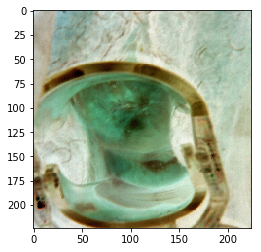

In [26]:
plt.imshow(imgs[0][1:-2,1:-2])

In [27]:
res_preds=resnet.predict(imgs_processed[:,1:-2,1:-2])

In [15]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=0)
sss.get_n_splits(imgs,types)

2

In [16]:
#startfied val
for train_index, test_index in sss.split(imgs, types):
   #trn, val = res_preds[train_index], res_preds[test_index]
   y, y_val = types[train_index], types[test_index]
   trn_imgs, val_imgs = imgs_processed[train_index], imgs_processed[test_index]

In [49]:
types=types-1

In [65]:
train_index, test_index = train_test_split(range(len(res_preds)))
trn, val = preds_combined[train_index], preds_combined[test_index]
y, y_val = types[train_index], types[test_index]

In [31]:
trn_imgs.shape,val_imgs.shape,y.shape,y_val.shape

((1110, 227, 227, 3), (370, 227, 227, 3), (1110,), (370,))

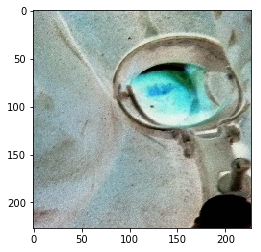

In [32]:
plt.imshow(trn_imgs[0])

## new model

In [30]:
from keras.models import Sequential
from keras.layers import Input,Lambda,ZeroPadding2D,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout,Conv2D,Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical

In [51]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


batch_size = 16

generator = train_datagen.flow_from_directory(
        'train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',  # this means our generator will only yield batches of data, no labels
        shuffle=False)

Found 7626 images belonging to 3 classes.


In [43]:
new_model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
new_model.fit_generator(
        generator,
        samples_per_epoch=2000 // batch_size,
        nb_epoch=50,
        #validation_data=validation_generator,
        #validation_steps=800 // batch_size
)

Epoch 1/50
128/125 [==============================] - 30s - loss: 15.4885 - acc: 0.0391    

/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '



Epoch 2/50
128/125 [==============================] - 29s - loss: 15.7403 - acc: 0.0234    
Epoch 3/50
128/125 [==============================] - 30s - loss: 15.7403 - acc: 0.0234    
Epoch 4/50
 80/125 [==================>...........] - ETA: 10s - loss: 15.7151 - acc: 0.0250   

KeyboardInterrupt: 

In [40]:
early_stopping =EarlyStopping(monitor='val_loss', patience=3)
results_path='/mnt/kaggle_crevical/results/'
STAMP='small_model'
bst_model_path = results_path+STAMP + '.h5'

model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

hist = new_model.fit(trn_imgs,to_categorical(y-1), \
        validation_data=(val_imgs,to_categorical(y_val-1)), \
        nb_epoch=200, shuffle=True, \
        callbacks=[early_stopping, model_checkpoint])

Train on 5337 samples, validate on 2288 samples
Epoch 1/200
5337/5337 [==============================] - 25s - loss: 10.4597 - acc: 0.3502 - val_loss: 7.8618 - val_acc: 0.5122
Epoch 2/200
1408/5337 [======>.......................] - ETA: 15s - loss: 9.9937 - acc: 0.3800

KeyboardInterrupt: 

## finetune VGG

In [11]:
from keras.layers import Dense,BatchNormalization,Flatten,Dropout,MaxPooling2D
from keras.layers.convolutional import Convolution2D 
from keras.models import Model,Sequential
from keras.optimizers import Adam

In [8]:
def split_at(model, layer_type):
    layers = model.layers
    layer_idx = [index for index,layer in enumerate(layers) if type(layer) is layer_type][-1]
    return layers[:layer_idx+1], layers[layer_idx+1:]

In [9]:
conv_layers,fc_layers = split_at(vgg, Convolution2D)

In [12]:
conv_model = Sequential(conv_layers)

In [519]:
conv_trn=conv_model.predict(trn)
conv_val=conv_model.predict(val)

In [524]:
save_array('train/shrunk_files/conv_trn',conv_trn)
save_array('train/shrunk_files/conv_val',conv_val)
save_pickle('train/shrunk_files/y.p',y)
save_pickle('train/shrunk_files/y_val.p',y_val)

In [15]:
cd ..

/mnt/kaggle_crevical


In [19]:
conv_trn=load_array('train/shrunk_files/conv_trn')
conv_val=load_array('train/shrunk_files/conv_val')
y=load_pickle('train/shrunk_files/y.p')
y_val=load_pickle('train/shrunk_files/y_val.p')

In [27]:
# bn layers
p=0.7
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        BatchNormalization(axis=1),
        Dropout(p/4),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(3, activation='softmax')
    ]

In [28]:
model1 =Sequential(get_bn_layers(p))

In [29]:
model1.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y

In [31]:
model1.fit(conv_trn, to_categorical(y)[:,1:], batch_size=32 \
           ,validation_data=(conv_val,to_categorical(y_val)[:,1:]))

Train on 5337 samples, validate on 2288 samples
Epoch 1/10
5337/5337 [==============================] - 34s - loss: 1.3764 - acc: 0.4570 - val_loss: 1.0933 - val_acc: 0.5389
Epoch 2/10
5337/5337 [==============================] - 34s - loss: 1.0085 - acc: 0.5451 - val_loss: 0.8607 - val_acc: 0.6023
Epoch 3/10
5337/5337 [==============================] - 34s - loss: 0.8056 - acc: 0.6386 - val_loss: 0.8368 - val_acc: 0.6320
Epoch 4/10
5337/5337 [==============================] - 34s - loss: 0.6566 - acc: 0.7146 - val_loss: 0.8895 - val_acc: 0.6351
Epoch 5/10
5337/5337 [==============================] - 34s - loss: 0.5698 - acc: 0.7590 - val_loss: 0.8526 - val_acc: 0.6552
Epoch 6/10
5312/5337 [============================>.] - ETA: 0s - loss: 0.5244 - acc: 0.7803

KeyboardInterrupt: 

#### some plots stuff

In [397]:
# lets see what vgg says, top 5:
#top_preds=np.argsort(preds)[:,:5]
top_20_1=np.array(Counter(np.argsort(preds[np.array(type_1_idx),:])[:,:5].flatten()).most_common()[:20])
top_20_2=np.array(Counter(np.argsort(preds[np.array(type_2_idx),:])[:,:5].flatten()).most_common()[:20])
top_20_3=np.array(Counter(np.argsort(preds[np.array(type_3_idx),:])[:,:5].flatten()).most_common()[:20])

In [398]:
df_1=pd.DataFrame(top_20_1,columns=[0,1]).set_index(0)
df_2=pd.DataFrame(top_20_2,columns=[0,2]).set_index(0)
df_3=pd.DataFrame(top_20_3,columns=[0,3]).set_index(0)

In [176]:
combined=df_1.join(df_2,how='outer').join(df_3,how='outer')

In [177]:
sums=combined/combined.sum()

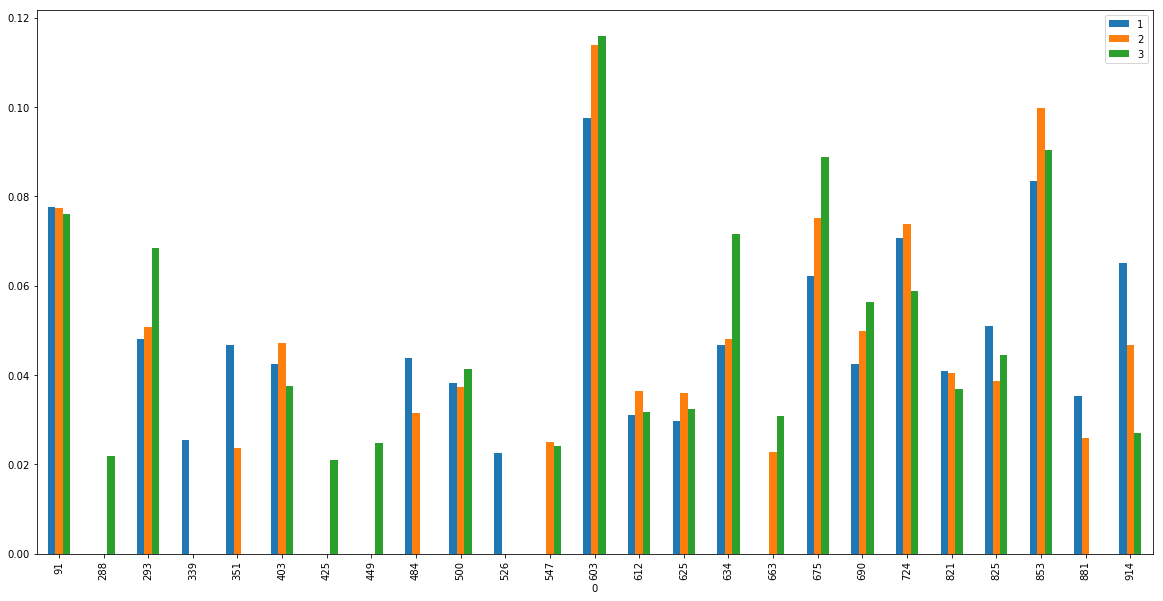

In [178]:
sums.plot.bar(figsize=[20,10])

## xgboost

### combined preds

In [57]:
import cervical_utils
from imp import reload


In [59]:
from keras_squeezenet import SqueezeNet
model_squeeze=SqueezeNet()

In [60]:
preds_squeezenet=model_squeeze.predict(imgs)

In [61]:
preds_squeezenet.shape

(1480, 1000)

In [64]:
preds_combined=np.concatenate([res_preds,preds_squeezenet],axis=1)

### xgb model

In [67]:
clf = xgb.XGBClassifier(max_depth=10, n_estimators=1500,min_child_weight=9,learning_rate=0.01,
                       nthread=8, subsample=0.80,colsample_bytree=0.80,seed=4242)

#learning rate .05 => 0.98 vgg
#learning rate .005 => 0.96 vgg
#resnet: 0.81,0.8, 0.01=>0.79,.78 preprocessed-0.87LB
#resnet_squeezenet - .82 on small data
clf.fit(preds_combined , types,eval_set=[(val, y_val)], eval_metric='mlogloss', verbose=True, early_stopping_rounds=50)
#, eval_set=[(val_x, val_y)]

[0]	validation_0-mlogloss:1.09231
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.08672
[2]	validation_0-mlogloss:1.08111
[3]	validation_0-mlogloss:1.07475
[4]	validation_0-mlogloss:1.06917
[5]	validation_0-mlogloss:1.06341
[6]	validation_0-mlogloss:1.05774
[7]	validation_0-mlogloss:1.05193
[8]	validation_0-mlogloss:1.04628
[9]	validation_0-mlogloss:1.04062
[10]	validation_0-mlogloss:1.03481
[11]	validation_0-mlogloss:1.02914
[12]	validation_0-mlogloss:1.02344
[13]	validation_0-mlogloss:1.01798
[14]	validation_0-mlogloss:1.01291
[15]	validation_0-mlogloss:1.00795
[16]	validation_0-mlogloss:1.00271
[17]	validation_0-mlogloss:0.997774
[18]	validation_0-mlogloss:0.992416
[19]	validation_0-mlogloss:0.987199
[20]	validation_0-mlogloss:0.981861
[21]	validation_0-mlogloss:0.976823
[22]	validation_0-mlogloss:0.971895
[23]	validation_0-mlogloss:0.966846
[24]	validation_0-mlogloss:0.962011
[25]	validation_0-mlogloss:0.957023
[26]	validation_0-mlog

[224]	validation_0-mlogloss:0.427541
[225]	validation_0-mlogloss:0.426092
[226]	validation_0-mlogloss:0.424713
[227]	validation_0-mlogloss:0.423363
[228]	validation_0-mlogloss:0.422237
[229]	validation_0-mlogloss:0.420939
[230]	validation_0-mlogloss:0.419541
[231]	validation_0-mlogloss:0.418114
[232]	validation_0-mlogloss:0.416811
[233]	validation_0-mlogloss:0.415366
[234]	validation_0-mlogloss:0.413849
[235]	validation_0-mlogloss:0.412475
[236]	validation_0-mlogloss:0.411158
[237]	validation_0-mlogloss:0.409858
[238]	validation_0-mlogloss:0.408661
[239]	validation_0-mlogloss:0.407449
[240]	validation_0-mlogloss:0.406
[241]	validation_0-mlogloss:0.40484
[242]	validation_0-mlogloss:0.403496
[243]	validation_0-mlogloss:0.402298
[244]	validation_0-mlogloss:0.401179
[245]	validation_0-mlogloss:0.399851
[246]	validation_0-mlogloss:0.398563
[247]	validation_0-mlogloss:0.39732
[248]	validation_0-mlogloss:0.396033
[249]	validation_0-mlogloss:0.394848
[250]	validation_0-mlogloss:0.393572
[251]	

[447]	validation_0-mlogloss:0.232375
[448]	validation_0-mlogloss:0.231945
[449]	validation_0-mlogloss:0.231382
[450]	validation_0-mlogloss:0.230831
[451]	validation_0-mlogloss:0.230351
[452]	validation_0-mlogloss:0.229846
[453]	validation_0-mlogloss:0.229298
[454]	validation_0-mlogloss:0.228812
[455]	validation_0-mlogloss:0.22826
[456]	validation_0-mlogloss:0.227661
[457]	validation_0-mlogloss:0.227127
[458]	validation_0-mlogloss:0.226666
[459]	validation_0-mlogloss:0.226068
[460]	validation_0-mlogloss:0.225535
[461]	validation_0-mlogloss:0.225002
[462]	validation_0-mlogloss:0.224462
[463]	validation_0-mlogloss:0.223999
[464]	validation_0-mlogloss:0.223501
[465]	validation_0-mlogloss:0.222982
[466]	validation_0-mlogloss:0.222493
[467]	validation_0-mlogloss:0.222
[468]	validation_0-mlogloss:0.221566
[469]	validation_0-mlogloss:0.221021
[470]	validation_0-mlogloss:0.220587
[471]	validation_0-mlogloss:0.220162
[472]	validation_0-mlogloss:0.219642
[473]	validation_0-mlogloss:0.219144
[474]

[670]	validation_0-mlogloss:0.149948
[671]	validation_0-mlogloss:0.149695
[672]	validation_0-mlogloss:0.149407
[673]	validation_0-mlogloss:0.149173
[674]	validation_0-mlogloss:0.148933
[675]	validation_0-mlogloss:0.148714
[676]	validation_0-mlogloss:0.148483
[677]	validation_0-mlogloss:0.148276
[678]	validation_0-mlogloss:0.148026
[679]	validation_0-mlogloss:0.147779
[680]	validation_0-mlogloss:0.147548
[681]	validation_0-mlogloss:0.147294
[682]	validation_0-mlogloss:0.14709
[683]	validation_0-mlogloss:0.146792
[684]	validation_0-mlogloss:0.146548
[685]	validation_0-mlogloss:0.14629
[686]	validation_0-mlogloss:0.146057
[687]	validation_0-mlogloss:0.145818
[688]	validation_0-mlogloss:0.145566
[689]	validation_0-mlogloss:0.145311
[690]	validation_0-mlogloss:0.145068
[691]	validation_0-mlogloss:0.14487
[692]	validation_0-mlogloss:0.144656
[693]	validation_0-mlogloss:0.14444
[694]	validation_0-mlogloss:0.144175
[695]	validation_0-mlogloss:0.143952
[696]	validation_0-mlogloss:0.143716
[697]

[893]	validation_0-mlogloss:0.10873
[894]	validation_0-mlogloss:0.108584
[895]	validation_0-mlogloss:0.10845
[896]	validation_0-mlogloss:0.108335
[897]	validation_0-mlogloss:0.108215
[898]	validation_0-mlogloss:0.108097
[899]	validation_0-mlogloss:0.107959
[900]	validation_0-mlogloss:0.107821
[901]	validation_0-mlogloss:0.107686
[902]	validation_0-mlogloss:0.107549
[903]	validation_0-mlogloss:0.107386
[904]	validation_0-mlogloss:0.107253
[905]	validation_0-mlogloss:0.107096
[906]	validation_0-mlogloss:0.10696
[907]	validation_0-mlogloss:0.106833
[908]	validation_0-mlogloss:0.10671
[909]	validation_0-mlogloss:0.106581
[910]	validation_0-mlogloss:0.106443
[911]	validation_0-mlogloss:0.106281
[912]	validation_0-mlogloss:0.106136
[913]	validation_0-mlogloss:0.105987
[914]	validation_0-mlogloss:0.105852
[915]	validation_0-mlogloss:0.105717
[916]	validation_0-mlogloss:0.105581
[917]	validation_0-mlogloss:0.105465
[918]	validation_0-mlogloss:0.105312
[919]	validation_0-mlogloss:0.105175
[920]

[1113]	validation_0-mlogloss:0.08503
[1114]	validation_0-mlogloss:0.084947
[1115]	validation_0-mlogloss:0.084876
[1116]	validation_0-mlogloss:0.084806
[1117]	validation_0-mlogloss:0.084719
[1118]	validation_0-mlogloss:0.084621
[1119]	validation_0-mlogloss:0.084532
[1120]	validation_0-mlogloss:0.084451
[1121]	validation_0-mlogloss:0.084377
[1122]	validation_0-mlogloss:0.084308
[1123]	validation_0-mlogloss:0.084227
[1124]	validation_0-mlogloss:0.08414
[1125]	validation_0-mlogloss:0.084078
[1126]	validation_0-mlogloss:0.083999
[1127]	validation_0-mlogloss:0.083927
[1128]	validation_0-mlogloss:0.083841
[1129]	validation_0-mlogloss:0.083764
[1130]	validation_0-mlogloss:0.0837
[1131]	validation_0-mlogloss:0.083613
[1132]	validation_0-mlogloss:0.08354
[1133]	validation_0-mlogloss:0.083465
[1134]	validation_0-mlogloss:0.083382
[1135]	validation_0-mlogloss:0.083304
[1136]	validation_0-mlogloss:0.083228
[1137]	validation_0-mlogloss:0.083144
[1138]	validation_0-mlogloss:0.083074
[1139]	validation

[1330]	validation_0-mlogloss:0.070328
[1331]	validation_0-mlogloss:0.070277
[1332]	validation_0-mlogloss:0.070212
[1333]	validation_0-mlogloss:0.070156
[1334]	validation_0-mlogloss:0.070097
[1335]	validation_0-mlogloss:0.070042
[1336]	validation_0-mlogloss:0.069986
[1337]	validation_0-mlogloss:0.069933
[1338]	validation_0-mlogloss:0.06986
[1339]	validation_0-mlogloss:0.069803
[1340]	validation_0-mlogloss:0.069758
[1341]	validation_0-mlogloss:0.069703
[1342]	validation_0-mlogloss:0.06964
[1343]	validation_0-mlogloss:0.069582
[1344]	validation_0-mlogloss:0.069518
[1345]	validation_0-mlogloss:0.069455
[1346]	validation_0-mlogloss:0.069392
[1347]	validation_0-mlogloss:0.069331
[1348]	validation_0-mlogloss:0.069279
[1349]	validation_0-mlogloss:0.069229
[1350]	validation_0-mlogloss:0.069178
[1351]	validation_0-mlogloss:0.069122
[1352]	validation_0-mlogloss:0.069074
[1353]	validation_0-mlogloss:0.069025
[1354]	validation_0-mlogloss:0.068973
[1355]	validation_0-mlogloss:0.068932
[1356]	validat

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=9, missing=None, n_estimators=1500, nthread=8,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.8)

In [275]:
sum(clf.predict(val)==y_val)/len(y_val)

0.5243243243243243

In [276]:
from sklearn.metrics import log_loss

In [292]:
y_pred=clf.predict_proba(val)

In [285]:
np.unique(y_pred),np.unique(y_val)

(array([1, 2, 3]), array([1, 2, 3]))

In [293]:
log_loss(y_val,y_pred)

0.98047145327200758

## submission

In [74]:
#resent_squeezenet+xgb
def test_flow(test):
    test=preprocess_input(test.astype('float32'))
    res_preds=resnet.predict(test[:,1:-2,1:-2])
    preds_squeezenet=model_squeeze.predict(test)
    preds_combined=np.concatenate([res_preds,preds_squeezenet],axis=1)
    sub_preds=clf.predict_proba(preds_combined)
    return sub_preds

#### fine tuned section

In [2]:
#fine tuned vgg
test_pre_preds=conv_model.predict(test_imgs)

NameError: name 'conv_model' is not defined

In [40]:
sub_preds=model1.predict(test_pre_preds)

 #### resnet/vgg + xgboost

In [27]:
test_preds=resnet.predict(test_imgs_processed)

In [28]:
sub_preds=clf.predict_proba(test_preds)

In [75]:
sub_preds=test_flow(test_imgs_227)

In [76]:
new_preds_1 = do_clip(sub_preds,0.99) #82->.89
                                      #94->872  
                                     #97->871  
                                    #99->869,best  

In [77]:
classes = ['Type_1','Type_2','Type_3']
submission = pd.DataFrame(new_preds_1, columns=classes)

In [78]:
submission.insert(0,'image_name', test_ids)

In [79]:
submission.head()#,len(submission)

,image_name,Type_1,Type_2,Type_3
0,488.jpg,0.092784,0.403159,0.504057
1,389.jpg,0.144710,0.668675,0.186614
2,4.jpg,0.048085,0.333611,0.618305
3,166.jpg,0.299060,0.453069,0.247871
4,290.jpg,0.204948,0.526844,0.268208


In [80]:
len(submission)

512

In [81]:
submission.to_csv('squeeze_rez_xgb', index=False)

In [83]:
cd .

NameError: name 'training_csv' is not defined